In [139]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt


auto_df = pd.read_csv('automobile.txt')
auto_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [149]:
# list all the columns in the dataframe.
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [151]:
# Concise summary about dataset. This will help us understand the dataframe even more by knowing the type of data type it is.
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non


## Check for null values



In [152]:
# Use the isnull() function to search for null values. 
# However this can not effective because we have a large amount of data. 
# This is not effective because it just gives a true or false values and makes it very hard for the viewer to effectively 
# analyze the data

auto_df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Check for null values by ploting a heat map


Text(0.5, 1.0, 'Heatmap of null values')

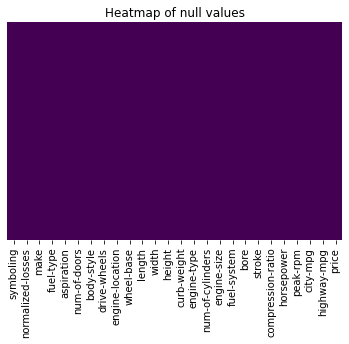

In [143]:
# This is very effective when have large amounts of data as it will plot a yellowish colour on the purple map 
# and this can help the viewer easily spot any null values.

#using the seaborn library to plot a heatmap for all null values
sns.heatmap(auto_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heatmap of null values")

In [145]:
# After running the above visualization we can see that they are no null values. 
# To again confirm this statement we can also use the issnull().sum() function to check for null values.

auto_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [146]:
# Get basic statistical details about the document
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [147]:
# when running the above code we relaize that there are columns missing. 
# This because it could not convert a string to float: '?'.

# Columns with numerical values and contain the string '?'.

col = ["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]

# to fix this we are going to replace the '?' value with NaN of all the columns
auto_df[col] = auto_df[col].replace('?', np.nan)

# Next we are going to convert the datatype from "object" to "float"
auto_df[col]  = auto_df[col] .apply( pd.to_numeric, errors='coerce' )

auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [148]:
# Now when we get the basic statistical details about the document we will get all the coulumns
auto_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [35]:
# calculate the average of all the coloumns with Null values and undergo imputation 
ave_nl = auto_df['normalized-losses'].mean()
ave_bore = auto_df['bore'].mean()
ave_stroke = auto_df['stroke'].mean()
ave_hp = auto_df['horsepower'].mean()
ave_pr = auto_df['peak-rpm'].mean()
ave_price = auto_df['price'].mean()

# imput the average values where there are Null values
auto_df['normalized-losses'].fillna(ave_nl, inplace=True)
auto_df['bore'].fillna(ave_bore, inplace=True)
auto_df['stroke'].fillna(ave_stroke, inplace=True)
auto_df['horsepower'].fillna(ave_hp, inplace=True)
auto_df['peak-rpm'].fillna(ave_pr, inplace=True)
auto_df['price'].fillna(ave_price, inplace=True)

Text(0.5, 1.0, 'Statistical details of the Automobile data')

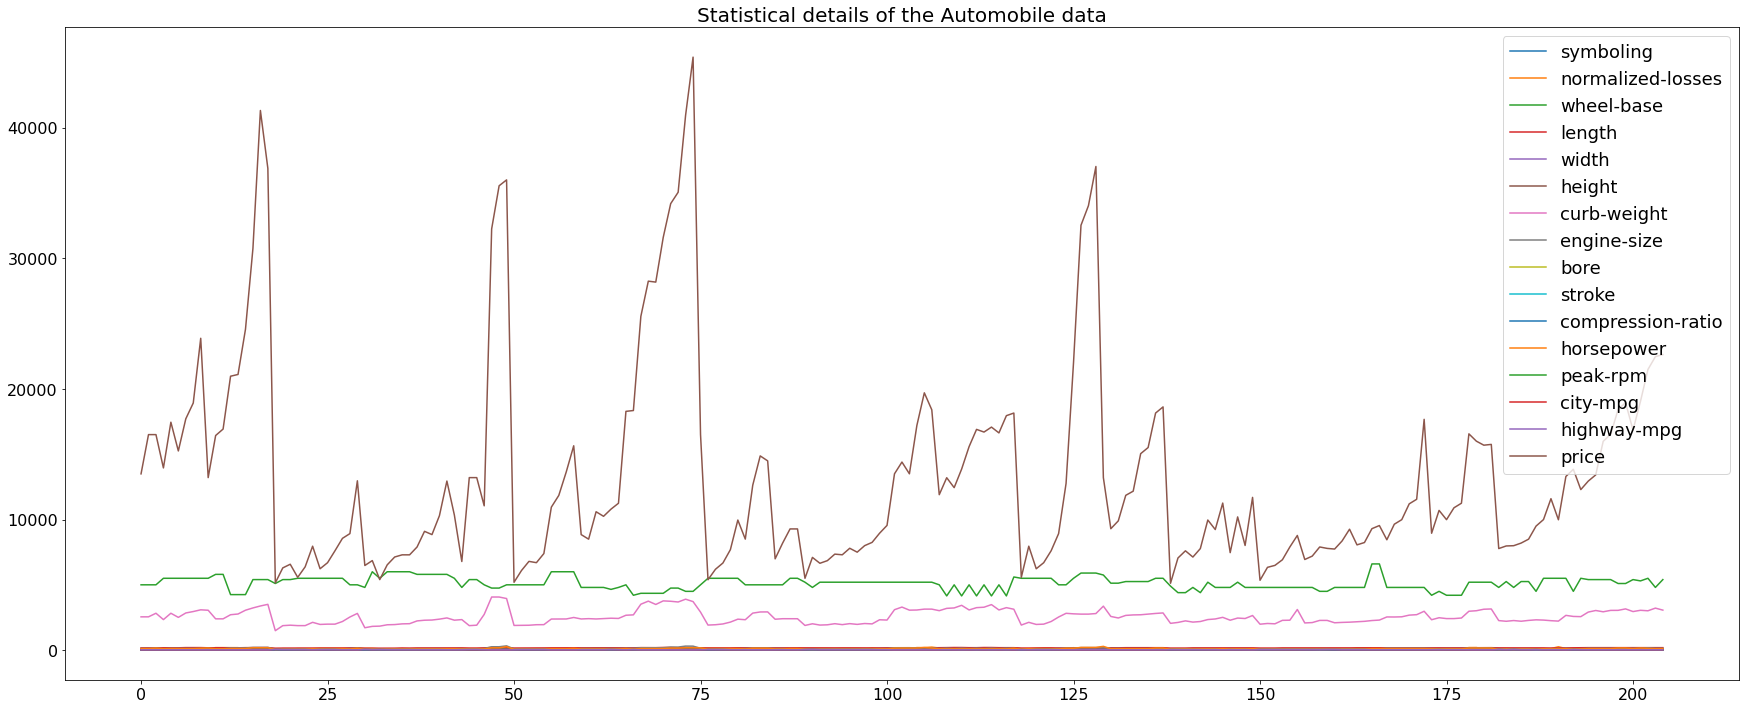

In [132]:
# plot all the statistical details
auto_df.plot(figsize=(30,12), fontsize=16)
plt.legend(fontsize=18)
plt.title("Statistical details of the Automobile data", fontsize=20)

Text(0.5, 1.0, 'Heatmap of all columns with numerical values')

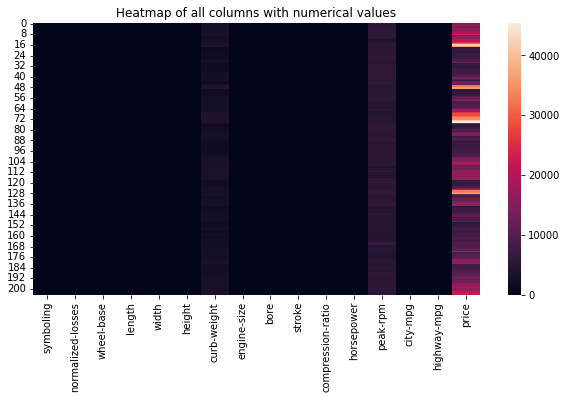

In [105]:
cols=['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore', 'stroke','compression-ratio', 'horsepower', 'peak-rpm','city-mpg','highway-mpg', 'price']

plt.figure(figsize = (10,5))
sns.heatmap(auto_df[cols])
plt.title("Heatmap of all columns with numerical values")


The "Price", "Peak-rpm", and "Curb-weight" are the top 3 columns with the highest values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'mazda'),
  Text(9, 0, 'mercedes-benz'),
  Text(10, 0, 'mercury'),
  Text(11, 0, 'mitsubishi'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'peugot'),
  Text(14, 0, 'plymouth'),
  Text(15, 0, 'porsche'),
  Text(16, 0, 'renault'),
  Text(17, 0, 'saab'),
  Text(18, 0, 'subaru'),
  Text(19, 0, 'toyota'),
  Text(20, 0, 'volkswagen'),
  Text(21, 0, 'volvo')])

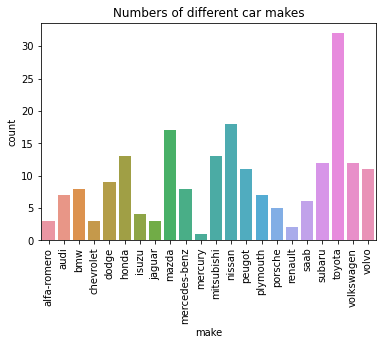

In [23]:
# check how the data is distributed.
sns.countplot(x='make', data = auto_df)
plt.title("Numbers of different car makes")
plt.xticks(rotation=90)

Toyota, Nissan and Mazda are 3 most common cars and Mercury, Renault and Chervrolet are the 3 least most common cars.

Text(0.5, 1.0, 'Numbers of different car body-styles')

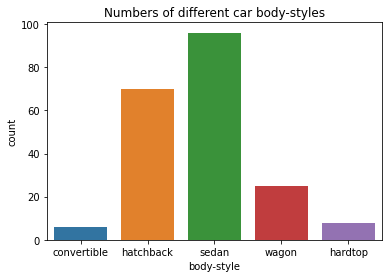

In [38]:
# check for how many different body types they are
sns.countplot(x='body-style', data = auto_df)
plt.title("Numbers of different car body-styles")

Only a small amount of people own convertible and hardtop cars.
The visulization clearly show that the sedan body-style and hatchback are the most desireble car body styles.


C:\Users\Abrish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prices for the different cars')

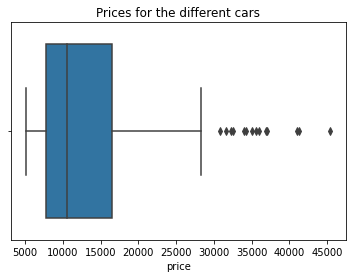

In [52]:
# box plot for price
sns.boxplot(auto_df['price'])
plt.title("Prices for the different cars")

Box plot of price. The average price for cars is just above 10 000. The visulization also shows multiple outliers for the 
maximum price for the cars with the most expensive ones ranging from 40 000 to just over 45 000.

Text(0.5, 1.0, 'Range of the cars horsepower')

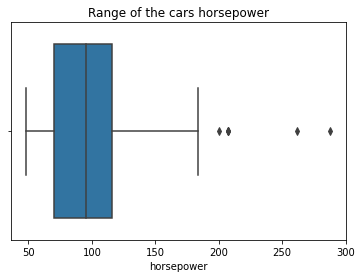

In [40]:
# box plot for horsepower
sns.boxplot(x='horsepower', data = auto_df)
plt.title("Range of the cars horsepower")

The average cars horsepower is just under 100 with most of the cars ranging from about 75 to 115. The visualization also 
shows us a few outliers with the highest value of about 290 horsepower.

Text(0.5, 1.0, 'Price Vs Horsepower')

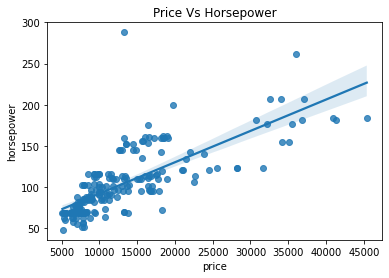

In [44]:
# see how the price of the car compares to the amount of horsepower
sns.regplot(x=auto_df['price'], y=auto_df['horsepower'])
plt.title("Price Vs Horsepower")

This visulization suggests that there is a direct relationship between Price and Horsepower. The higher the price the higher the horsepower.

Text(0.5, 1.0, 'Engine-sizes for the different cars')

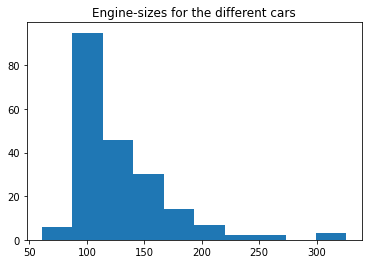

In [57]:
# box plot for price
plt.hist(auto_df['engine-size'])
plt.title("Engine-sizes for the different cars")

Text(0.5, 0, 'Price')

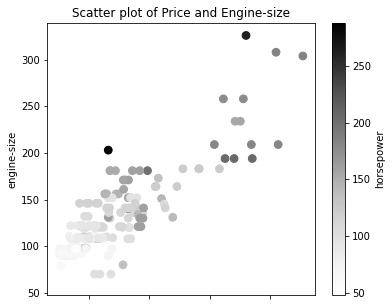

In [129]:
# scatterplot of the relationship between price and engine-size and relationship of horsepower and engine-size
# i have also labbled the dots with the different shades of the horsepower the car will have
auto_df.plot.scatter(x= 'price', y = 'engine-size', c ='horsepower', s=60, figsize=(6, 5))
plt.title("Scatter plot of Price and Engine-size")
plt.xlabel("Price")

The above graph also shows us that they is also a direct relationship between the price and the engine-size. The graph also suggests that the higher the engine size the higher the horsepower because on average the dots become darker.

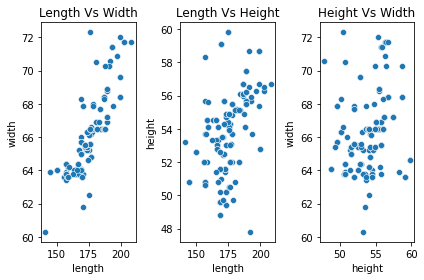

In [155]:
# relationship between Length, Width and Height

fig, ax=plt.subplots(1,3)
sns.scatterplot(x=auto_df['length'], y=auto_df['width'],ax=ax[0])
ax[0].set_title("Length Vs Width")
sns.scatterplot(x=auto_df['length'], y=auto_df['height'],ax=ax[1])
ax[1].set_title("Length Vs Height")
sns.scatterplot(x=auto_df['height'], y=auto_df['width'],ax=ax[2])
ax[2].set_title("Height Vs Width")
plt.tight_layout()


All there of the graphs have a similar relationship (The higher the x value the higher the y value). The last graph howere has a much weaker relationship as compared to the first two graph as there are many outliers.

Text(0.5, 1.0, 'Highway-mpg Vs City-mpg')

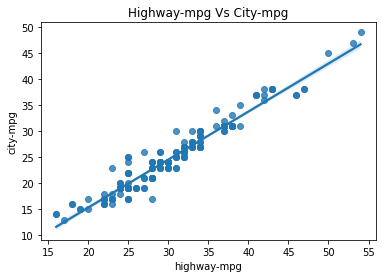

In [42]:
# relationship between Highway-mpg Vs City-mpg
sns.regplot(x=auto_df['highway-mpg'], y=auto_df['city-mpg'])
plt.title("Highway-mpg Vs City-mpg")

The above graph shows a very strong direct relationship between Highway-mpg and City-mpg. 

Text(0.5, 1.0, 'Different car engine-location')

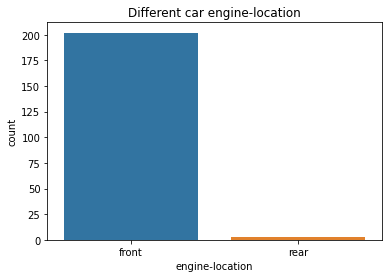

In [157]:
# check how many body-styles they are
sns.countplot(x='engine-location', data = auto_df)
plt.title("Different car engine-location")

Almost all cars have their engines in the front while a very small persentage of people have their car engines
at the rear end of the car.

Text(0.5, 1.0, 'Different car drive-wheels')

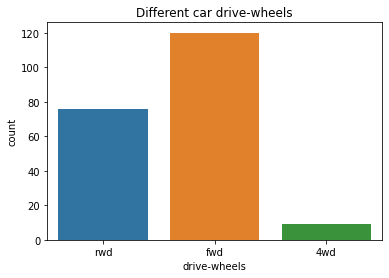

In [110]:
# check stats for the number of different drive-wheels on cars
sns.countplot(x='drive-wheels', data = auto_df)
plt.title("Different car drive-wheels")

We have 3 different drive-wheels (rwd, fwd and 4wd). Most cars are fwd followed by rwd and a vey small persentage of 
cars are 4wd.

Text(0.5, 1.0, 'Different car Compression-Ratios')

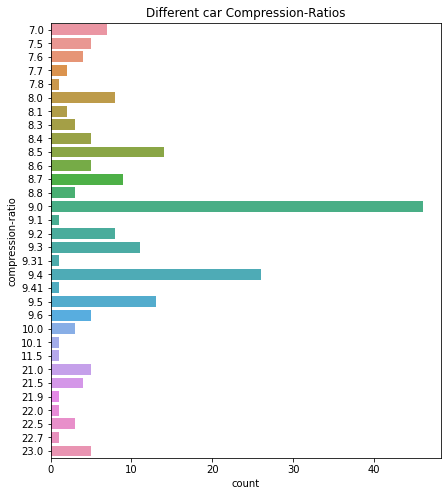

In [126]:
# check for how many different car Compression-Ratios they are
plt.figure(figsize = (7,8))
sns.countplot(y='compression-ratio', data = auto_df)
plt.title("Different car Compression-Ratios")

There are many different car compression ratios but only a few stand out from the visualization. Mainly the compression ratio with 9.0 as it is by far the most common ratio with almost 50 cars having it, followed by 9.4 with about 25 cars and both 8.5 and 9.5 with more or less a similar amount of cars of 14.

Text(0.5, 1.0, 'Range of cars peak-rpm')

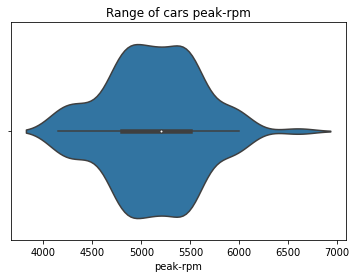

In [128]:
# box plot for horsepower
sns.violinplot(x='peak-rpm', data = auto_df)
plt.title("Range of cars peak-rpm")

The average peak-rpm is about 52 000 with most of the cars having a peak rpm between 48 000 and 55 000.

Text(0.5, 1.0, 'Different car strokes')

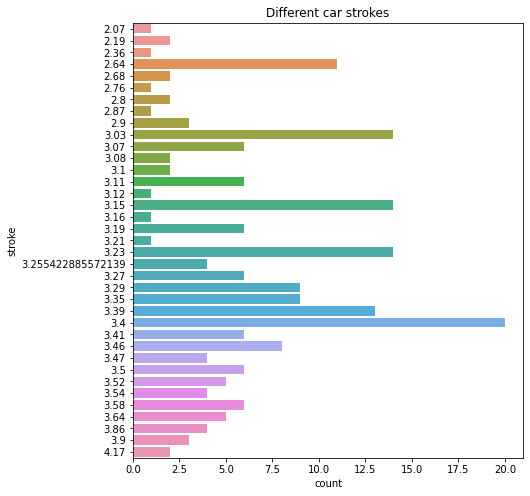

In [127]:
# check for how many different car Compression-Ratios they are
plt.figure(figsize = (7,8))
sns.countplot(y='stroke', data = auto_df)
plt.title("Different car strokes")

There are many different car stroke but only a few stand out from the visualization. These are 3.4 with the highest stroke of about 20 cars. 3.23, 3.15 and 3.03 with about 14 cars

In [133]:
# most common body-style
auto_df["body-style"]. value_counts(). idxmax()

'sedan'

In [134]:
# most common drive-wheels
auto_df["drive-wheels"]. value_counts(). idxmax()

'fwd'

In [135]:
# most common aspiration
auto_df["aspiration"]. value_counts(). idxmax()

'std'